In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Read in the data
df = pd.read_csv('M3_Sep2021.csv')
df

/home/mbg/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


,Day,Lane,MinPM,TimeID,Speed,GapTime
1,1,3,0.083333,0,88,11.63
2,1,3,0.183333,0,107,5.40
3,1,3,0.633333,0,78,26.66
4,1,2,0.733333,0,103,46.38
5,1,3,0.750000,0,86,7.26
...,...,...,...,...,...,...
1722972,30,2,1439.100000,287,114,17.60
1722973,30,3,1439.200000,287,108,9.78
1722974,30,2,1439.233333,287,121,8.03
1722975,30,3,1439.233333,287,104,2.32


In [2]:
df_day15 = df[df['Day'] == 15]
df_day15.head(3)

,Day,Lane,MinPM,TimeID,Speed,GapTime
814583,15,3,0.566667,0,122,65.54
814584,15,2,0.750000,0,105,65.54
814585,15,3,0.966667,0,79,23.91


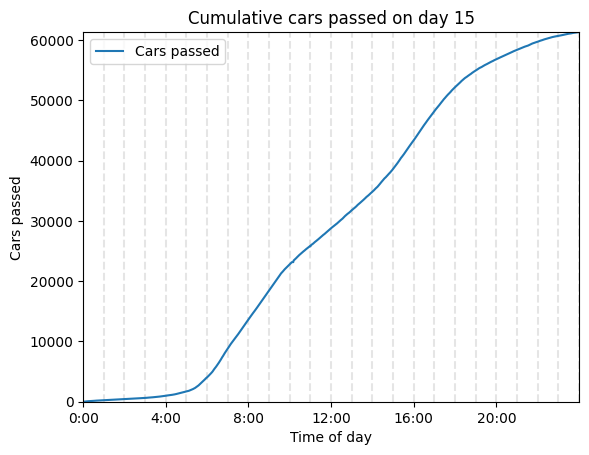

In [3]:
# Draw a cumulative diagram of cars passed,
# based on minutes passed midnight (MinPM)

cum_cars = {}

for i in range(1, 24*60):
    cum_cars[i] = df_day15[df_day15['MinPM'] < i].shape[0]
    


# Make a line for each hour
for h in range(0, 25):
    plt.axvline(h, color='gray', linestyle='--', alpha=0.2)

# Make x and y mininmum 0
plt.xlim(0, 24)
plt.ylim(0, max(cum_cars.values()))

# Do ticks every 4 hours
plt.xticks(range(0, 24, 4), labels=[f'{h}:00' for h in range(0, 24, 4)])

plt.xlabel('Time of day')

plt.plot([m/60 for m in cum_cars.keys()], cum_cars.values(), label='Cars passed')


plt.ylabel('Cars passed')
plt.title('Cumulative cars passed on day 15')
plt.legend()
plt.show()

### 1.2.b

In [4]:
df_grouped = df.groupby(['Day', 'TimeID', 'Lane']).agg({'MinPM': 'count', 'Speed': 'mean', 'GapTime': 'mean'})
# Rename columns to be sensible
# MinPM is the number of cars passed in the time period
# Speed is the average speed of the cars in the lane in the time period
# GapTime is the average time between cars in the lane in the time period
df_grouped.columns = ['CarsPassed', 'AverageSpeed', 'AverageGapTime']

# Calculate flow per hour
df_grouped['FlowPerHour'] = df_grouped['CarsPassed'] * 12 # 60 minutes / 5 minute period = 12 periods per hour

# Calculate density using k = q / v
df_grouped['Density'] = df_grouped['FlowPerHour'] / df_grouped['AverageSpeed'] # cars / km

df_grouped.head(11)

CarsPassed  AverageSpeed  AverageGapTime  FlowPerHour  \
Day TimeID Lane                                                          
1   0      1              3    122.000000       48.726667           36   
           2             16    107.875000       14.618750          192   
           3             19     97.684211       15.424737          228   
    1      1              1    119.000000       65.540000           12   
           2              8    110.125000       25.033750           96   
           3             14     95.357143       21.117857          168   
    2      2              7    107.857143       41.185714           84   
           3              8    100.250000       33.566250           96   
    3      1              1    115.000000       65.540000           12   
           2             14    112.142857       21.922857          168   
           3             13    101.692308       22.880769          156   

                  Density  
Day TimeID Lane            
1   0      1     0.295082  
           2     1.779838  
           3     2.334052  
    1      1     0.100840  
           2     0.871737  
           3     1.761798  
    2      2     0.778808  
           3     0.957606  
    3      1     0.104348  
           2     1.498089  
           3     1.534039

### 1.2.c

In [5]:
df_grouped.reset_index(inplace=True)
df_grouped

,Day,TimeID,Lane,CarsPassed,AverageSpeed,AverageGapTime,FlowPerHour,Density
0,1,0,1,3,122.000000,48.726667,36,0.295082
1,1,0,2,16,107.875000,14.618750,192,1.779838
2,1,0,3,19,97.684211,15.424737,228,2.334052
3,1,1,1,1,119.000000,65.540000,12,0.100840
4,1,1,2,8,110.125000,25.033750,96,0.871737
...,...,...,...,...,...,...,...,...
13888,30,286,2,12,109.583333,23.454167,144,1.314068
13889,30,286,3,20,103.750000,12.041500,240,2.313253
13890,30,287,1,3,114.666667,22.673333,36,0.313953
13891,30,287,2,15,109.200000,17.791333,180,1.648352


In [6]:
df_grouped.groupby("TimeID")["AverageSpeed"].agg(["mean", "std"])

,mean,std
TimeID,,
0,107.726739,14.886269
1,108.151301,15.709489
2,107.549476,14.078984
3,105.980555,18.001173
4,109.125988,15.472894
...,...,...
283,108.594583,13.417749
284,108.924626,12.822858
285,109.100998,13.120545


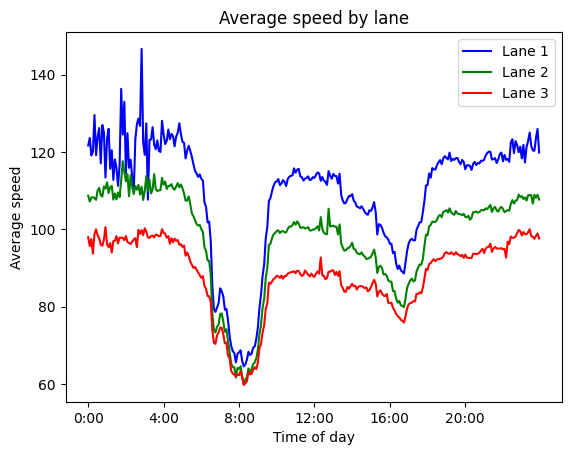

In [7]:
# Plot speed as function only of TimeID, color by lane

# Collapse the multi-index - cause this  is annoying to work with
df_lane_1 = df_grouped[df_grouped["Lane"] == 1]
df_lane_2 = df_grouped[df_grouped["Lane"] == 2]
df_lane_3 = df_grouped[df_grouped["Lane"] == 3]

df_lane_1.groupby("TimeID")["AverageSpeed"].mean().plot(label="Lane 1", color='blue')
df_lane_2.groupby("TimeID")["AverageSpeed"].mean().plot(label="Lane 2", color='green')
df_lane_3.groupby("TimeID")["AverageSpeed"].mean().plot(label="Lane 3", color='red')


plt.xlabel("Time of day")
# Calculate the xticks for every 4 hours (12 * 4 periode)
plt.xticks(
    [i * 12 * 4 for i in range(0, 24 // 4)], labels=[f"{h}:00" for h in range(0, 24, 4)]
)

plt.ylabel("Average speed")
plt.title("Average speed by lane")
plt.legend()
plt.show()

/tmp/ipykernel_128516/1516868723.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


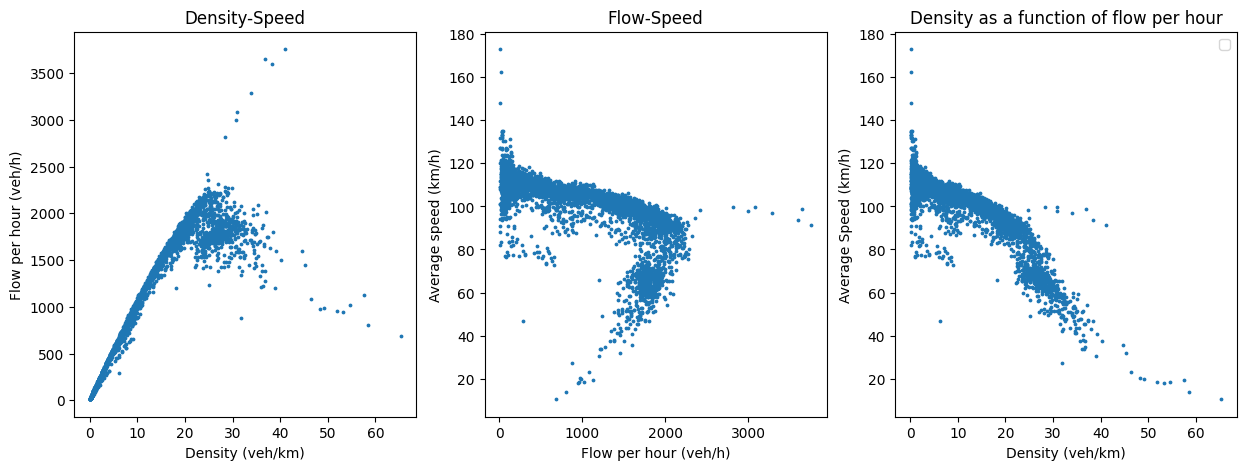

In [15]:
# Plot the density as a function of flow per hour, color by lane

# Make three subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Make three plots next to each other
# df_grouped.groupby(["Day", "TimeID"]).mean().plot.scatter(
#    x="Density", y="AverageSpeed", s=3, title="Density-Speed"
# )

# Consider each (Day, TimeID) as a point in the plot

# Plot Density-Flow on first subplot
axs[0].scatter(
    df_lane_2.groupby(["Day", "TimeID"]).mean()["Density"],
    df_lane_2.groupby(["Day", "TimeID"]).mean()["FlowPerHour"],
    s=3,
)
axs[0].set_title("Density-Speed")
axs[0].set_xlabel("Density (veh/km)")
axs[0].set_ylabel("Flow per hour (veh/h)")

# Plot Flow-Speed second subplot
axs[1].scatter(
    df_lane_2.groupby(["Day", "TimeID"]).mean()["FlowPerHour"],
    df_lane_2.groupby(["Day", "TimeID"]).mean()["AverageSpeed"],
    s=3,
)
axs[1].set_title("Flow-Speed")
axs[1].set_xlabel("Flow per hour (veh/h)")
axs[1].set_ylabel("Average speed (km/h)")

# Plot Density-Speed third subplot
axs[2].scatter(
    df_lane_2.groupby(["Day", "TimeID"]).mean()["Density"],
    df_lane_2.groupby(["Day", "TimeID"]).mean()["AverageSpeed"],
    s=3,
)
axs[2].set_title("Density-Flow")
axs[2].set_xlabel("Density (veh/km)")
axs[2].set_ylabel("Average speed (km/h)")




plt.xlabel("Density (veh/km)")
plt.ylabel("Average Speed (km/h)")

plt.title("Density as a function of flow per hour")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Smulders model vs data')

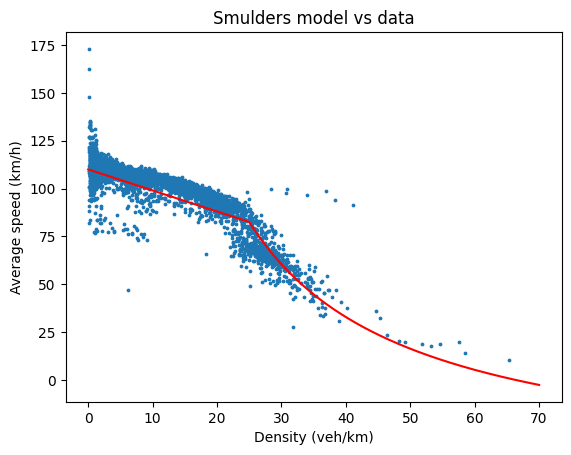

In [68]:
def v_smulders(k, k_c, v_0, alpha, beta):
    """
    Calculate the Smulders fundamental diagram
    """
    if k <= k_c:
        # If not yet congested, speed decreases linearly with density
        return v_0 * (1 - (k / k_c) * alpha)
    else:
        # If congested, flow decreases linearly with density
        v_c = v_0 * (1 - alpha)
        q_c = k_c * v_c
        q = q_c - beta * (k - k_c)
        return q / k

# Make initial guesses for the parameters
k_c = 25 # veh/km
v_0 = 110 # km/h
alpha = 0.25
beta = 50

# Plot these on top of the data
k_values = np.linspace(0, 70, 1000)
v_values = [v_smulders(k, k_c, v_0, alpha, beta) for k in k_values]

plt.scatter(df_lane_2['Density'], df_lane_2['AverageSpeed'], s=3, label='Data')
plt.plot(k_values, v_values, label='Smulders model', color='red')

plt.xlabel('Density (veh/km)')
plt.ylabel('Average speed (km/h)')
plt.title('Smulders model vs data')
 
    

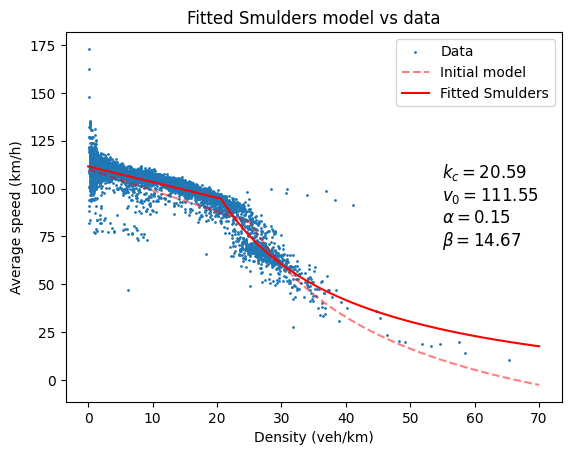

In [69]:
# Use numpy to fit the parameters to the data
from scipy.optimize import curve_fit


def fit_func(k, k_c, v_0, alpha, beta):
    return [v_smulders(k_i, k_c, v_0, alpha, beta) for k_i in k]


popt, pcov = curve_fit(
    fit_func,
    df_lane_2["Density"],
    df_lane_2["AverageSpeed"],
    p0=[k_c, v_0, alpha, beta],
)

# Plot the fitted model against the initial model and the data

# Scatter plot of the data
plt.scatter(df_lane_2["Density"], df_lane_2["AverageSpeed"], s=1, label="Data")

# Plot the initial model
plt.plot(
    k_values,
    v_values,
    label="Initial model",
    color="red",
    linestyle="dashed",
    alpha=0.5,
)

# Plot the fitted model
plt.plot(k_values, fit_func(k_values, *popt), label="Fitted Smulders", color="red")

# Write pretty latex with the fitted parameters in the right side of the plot
plt.text(
    55,
    70,
    f"$k_c = {popt[0]:.2f}$\n$v_0 = {popt[1]:.2f}$\n$\\alpha = {popt[2]:.2f}$\n$\\beta = {popt[3]:.2f}$",
    fontsize=12,
)

plt.xlabel("Density (veh/km)")
plt.ylabel("Average speed (km/h)")
plt.title("Fitted Smulders model vs data")
plt.legend()

plt.show()

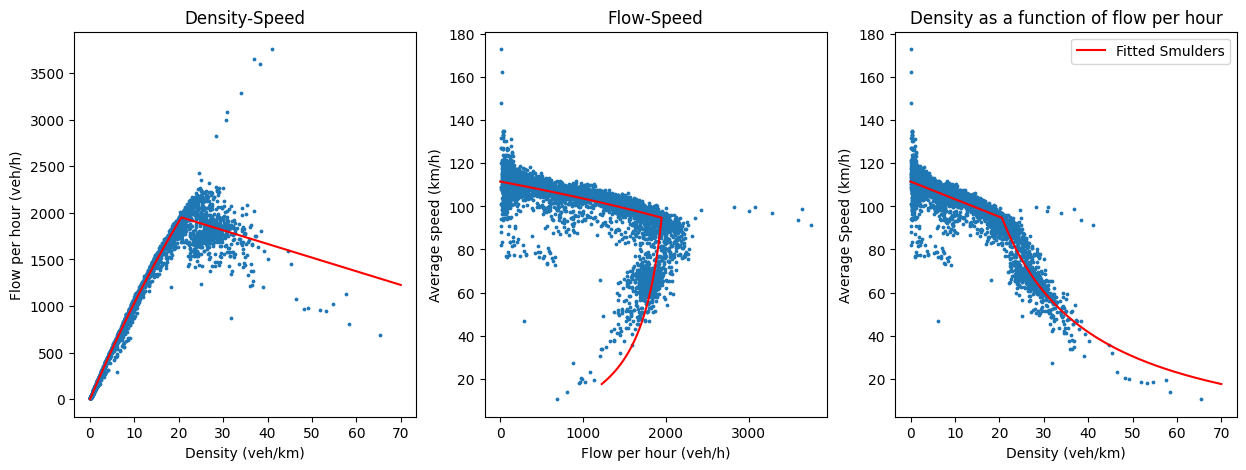

In [73]:
# Plot the model on top of the three subplots

# Make three subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Make three plots next to each other
# df_grouped.groupby(["Day", "TimeID"]).mean().plot.scatter(
#    x="Density", y="AverageSpeed", s=3, title="Density-Speed"
# )

# Consider each (Day, TimeID) as a point in the plot

# Plot Density-Flow on first subplot
axs[0].scatter(
    df_lane_2.groupby(["Day", "TimeID"]).mean()["Density"],
    df_lane_2.groupby(["Day", "TimeID"]).mean()["FlowPerHour"],
    s=3,
)

axs[0].set_title("Density-Speed")
axs[0].set_xlabel("Density (veh/km)")
axs[0].set_ylabel("Flow per hour (veh/h)")

# Plot the fitted model on top of the data
k_values = np.linspace(0, 70, 1000)
v_values = [v_smulders(k, *popt) for k in k_values]
q_values = [k * v for k, v in zip(k_values, v_values)]

axs[0].plot(k_values, q_values, label="Fitted Smulders", color="red")

# Plot Flow-Speed second subplot
axs[1].scatter(
    df_lane_2.groupby(["Day", "TimeID"]).mean()["FlowPerHour"],
    df_lane_2.groupby(["Day", "TimeID"]).mean()["AverageSpeed"],
    s=3,
)
axs[1].set_title("Flow-Speed")
axs[1].set_xlabel("Flow per hour (veh/h)")
axs[1].set_ylabel("Average speed (km/h)")

# Plot the fitted model on top of the data
axs[1].plot(
    q_values,
    v_values,
    label="Fitted Smulders",
    color="red",
)

# Plot Density-Speed third subplot
axs[2].scatter(
    df_lane_2.groupby(["Day", "TimeID"]).mean()["Density"],
    df_lane_2.groupby(["Day", "TimeID"]).mean()["AverageSpeed"],
    s=3,
)
axs[2].set_title("Density-Flow")
axs[2].set_xlabel("Density (veh/km)")
axs[2].set_ylabel("Average speed (km/h)")

# Plot the fitted model on top of the data
axs[2].plot(k_values, v_values, label="Fitted Smulders", color="red")

plt.xlabel("Density (veh/km)")
plt.ylabel("Average Speed (km/h)")

plt.title("Density as a function of flow per hour")
plt.legend()
plt.show()





In [61]:
# Calculate the v_c from the fitted parameters
v_c = popt[1] * (1 - popt[2])
v_c

np.float64(94.76443789831403)